In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import neurokit2 as nk
from datetime import datetime, timedelta
import pytz
import pickle
import os
from utility import read_timestamp, generate_info
import utility
from matplotlib.patches import PathPatch

In [8]:
meta_eoi = ['EYECLOSE', 'IN', 'QF',  'QS', 'RJ',]

colors = {'EYEOPEN':  '#00A0B0', 'BASELINE':  '#00A0B0', 'EYECLOSE':  '#00A0B0',
 'IN': '#6A4A3C',
 'QF': '#cc333f',
 'QS': '#eb6841',
 'RJ': '#edc951',
 'READ': '#a58c38',
 'LISTEN': '#f2d985',
 'SPEAK': '#a4482d', 'TYPE': '#ef8666'}


boxprops={
    'palette': colors,
     'flierprops': {"marker": "x"},
    'boxprops': {"edgecolor": "white"},
     'medianprops':{"color": "white", "linewidth": 1.6},
}


SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Analysis

In [3]:
df = pd.read_csv('../results/aggregated_eda.csv', index_col=0)
df = df[df.pid != 'PA17']
df

,pid,topic,cond,meta_cond,Mean_EDA,EDA_Changes,Mean_Tonic,SCL_Changes,Mean_Phasic,onsets
21,PA24,419.0,READ,RJ,0.487219,-0.145373,0.470151,-0.157792,1.730340e-02,0.632593
22,PA24,711.0,LISTEN,RJ,0.220025,-0.043577,0.211724,-0.050872,8.675342e-03,0.263602
23,PA24,314.0,LISTEN,RJ,0.668345,0.063271,0.630048,0.453796,3.826668e-02,0.605074
24,PA24,416.0,READ,RJ,0.722376,0.217408,0.651232,0.155633,7.117478e-02,0.504967
25,PA24,711.0,IN,IN,0.234719,-0.028883,0.233407,-0.029190,1.273636e-03,0.263602
...,...,...,...,...,...,...,...,...,...,...
744,PA10,416.0,QF,QF,0.317878,-0.013928,0.317617,-0.014659,4.312502e-04,0.331806
745,PA10,320.0,QF,QF,0.487629,-0.020872,0.487755,0.395787,7.398775e-06,0.508501
746,PA10,725.0,QF,QF,0.213161,0.001457,0.212905,0.001568,1.944086e-07,0.211704
747,PA10,725.0,SPEAK,QS,0.211652,-0.000052,0.210622,-0.000714,7.612248e-04,0.211704


In [4]:
df.meta_cond.value_counts()

meta_cond
RJ          176
IN          176
QS          176
QF          176
EYECLOSE     24
Name: count, dtype: int64

In [5]:
merge_df = df.drop(columns=['topic']).groupby(['pid', 'cond', 'meta_cond']).mean().reset_index()
merge_df

,pid,cond,meta_cond,Mean_EDA,EDA_Changes,Mean_Tonic,SCL_Changes,Mean_Phasic,onsets
0,PA10,EYECLOSE,EYECLOSE,0.948596,-0.012401,0.879390,-0.083564,0.069157,0.960997
1,PA10,IN,IN,0.346583,-0.004087,0.341992,0.130132,0.004403,0.350670
2,PA10,LISTEN,RJ,0.321007,-0.010800,0.319057,-0.013219,0.001694,0.331806
3,PA10,QF,QF,0.339556,-0.011115,0.339426,0.127566,0.000146,0.350670
4,PA10,READ,RJ,0.337208,-0.022895,0.336643,0.184991,0.000484,0.360103
...,...,...,...,...,...,...,...,...,...
162,PA9,LISTEN,RJ,0.638318,0.041447,0.578428,-0.010433,0.059741,0.596871
163,PA9,QF,QF,0.639477,0.002316,0.617046,-0.009706,0.022334,0.637161
164,PA9,READ,RJ,0.709938,0.012341,0.694506,0.010916,0.015342,0.697597
165,PA9,SPEAK,QS,0.653954,-0.004929,0.613644,-0.032710,0.040440,0.658884


C:\Users\CIDDA-usability-lab\.conda\envs\eeg\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\CIDDA-usability-lab\.conda\envs\eeg\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


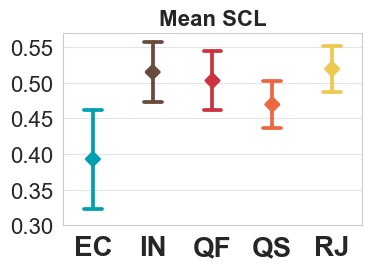

In [9]:
_, axes = plt.subplots(figsize=(4, 3))
sns.pointplot(data=merge_df, x='meta_cond', y='Mean_Tonic', ax=axes, order=meta_eoi, palette=colors, markers='D',
            errorbar='se', capsize=0.3)
axes.grid(axis='y', alpha=0.5)
plt.title('Mean SCL', weight='bold')
axes.set_xlabel(None)
axes.set_ylabel(None)
labels = [item.get_text() for item in axes.get_xticklabels()]
labels[0] = 'EC'
axes.set_xticklabels(labels)
axes.set_yticks(np.arange(0.30, 0.6, 0.05))
axes.set_ylim(0.3)
plt.xticks(fontweight='bold')
plt.tight_layout()
plt.savefig('../results/EDATonic_all.pdf', dpi=500)
plt.show()

In [10]:
import pingouin as pg

df = df[~df.meta_cond.isin(['EYEOPEN'])]
print(pg.normality(df, dv='Mean_Tonic', group="meta_cond").normal.value_counts())

normal
False    5
Name: count, dtype: int64


In [13]:
tb = pg.pairwise_tests(dv='Mean_Tonic', within='meta_cond', subject='pid', data=df, effsize='CLES', correction=False, parametric=False)#, return_desc=True)
tb.loc[:, 'p-corr'] = tb['p-unc'].values * 4
tb.loc[:, 'variable'] = 'Mean_Tonic'
tb = tb.round(3)[['A', 'B', 'W-val', 'p-unc', 'p-corr', 'CLES', 'variable']]
tb.to_csv('../results/eda_posthoc.csv')
tb

,A,B,W-val,p-unc,p-corr,CLES,variable
0,EYECLOSE,IN,99.0,0.090,0.361,0.419,Mean_Tonic
1,EYECLOSE,QF,109.0,0.156,0.625,0.432,Mean_Tonic
2,EYECLOSE,QS,132.0,0.426,1.705,0.458,Mean_Tonic
3,EYECLOSE,RJ,101.0,0.101,0.406,0.413,Mean_Tonic
4,IN,QF,86.0,0.039,0.157,0.514,Mean_Tonic
5,IN,QS,95.0,0.071,0.284,0.546,Mean_Tonic
6,IN,RJ,156.0,0.874,3.496,0.485,Mean_Tonic
7,QF,QS,127.0,0.353,1.410,0.531,Mean_Tonic
8,QF,RJ,112.0,0.182,0.727,0.472,Mean_Tonic
9,QS,RJ,59.0,0.004,0.017,0.438,Mean_Tonic


## Process

In [15]:
plist, candlist = utility.get_candlist(exclude=['PA14'])
pinfos = generate_info(plist, exclude=None, parent_dir="../data")

N. Selected Participants: 25 N. Selected Trials: 181
[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24, 27, 28, 29, 30, 31, 32, 33]
[('PA6', 314), ('PA7', 314), ('PA8', 314), ('PA9', 314), ('PA11', 314), ('PA12', 314), ('PA13', 314), ('PA15', 314), ('PA17', 314), ('PA18', 314), ('PA19', 314), ('PA20', 314), ('PA24', 314), ('PA27', 314), ('PA28', 314), ('PA33', 314), ('PA7', 320), ('PA8', 320), ('PA9', 320), ('PA10', 320), ('PA5', 320), ('PA11', 320), ('PA12', 320), ('PA18', 320), ('PA20', 320), ('PA21', 320), ('PA22', 320), ('PA28', 320), ('PA30', 320), ('PA31', 320), ('PA32', 320), ('PA33', 320), ('PA6', 353), ('PA8', 353), ('PA9', 353), ('PA12', 353), ('PA16', 353), ('PA17', 353), ('PA18', 353), ('PA22', 353), ('PA27', 353), ('PA28', 353), ('PA29', 353), ('PA30', 353), ('PA31', 353), ('PA33', 353), ('PA7', 355), ('PA8', 355), ('PA9', 355), ('PA5', 355), ('PA11', 355), ('PA12', 355), ('PA15', 355), ('PA18', 355), ('PA19', 355), ('PA20', 355), ('PA21', 355), ('PA22', 3

In [16]:
data = {}
eoi = ['EYECLOSE', 'IN', 'QF', 'LISTEN', 'READ', 'TYPE', 'SPEAK', ]

for p, files in pinfos.items():
    epochs, events = read_timestamp(files['timestamp_file'], files['tskey_file'])[2:]
    eda_file = os.path.join(files['folder_dir'], 'EDA_clean.csv')
    df = pd.read_csv(eda_file, index_col=0)
    df.loc[:, 'pid'] = p
    df = utility.attach_info(p, df, epochs, events, candlist, plist, max_duration=None)
    data.update({p: {'epochs': epochs, 'time': events, 'data': df}})
print('Total Valid Data:', len(data))

C:\Users\CIDDA-usability-lab\OneDrive - RMIT University\experiment data\utility.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '711.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df.sec >= row.start_sec) & (df.sec < row.end_sec), 'topic'] = str(row.Topic)
C:\Users\CIDDA-usability-lab\OneDrive - RMIT University\experiment data\utility.py:103: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '+1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df.sec >= start_sec) & (df.sec <= end_sec), 'cond'] = row.stage
C:\Users\CIDDA-usability-lab\OneDrive - RMIT University\experiment data\utility.py:110: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '+1' has dtype incompatible with f

Total Valid Data: 25


C:\Users\CIDDA-usability-lab\OneDrive - RMIT University\experiment data\utility.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '708.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df.sec >= row.start_sec) & (df.sec < row.end_sec), 'topic'] = str(row.Topic)
C:\Users\CIDDA-usability-lab\OneDrive - RMIT University\experiment data\utility.py:103: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '+1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df.sec >= start_sec) & (df.sec <= end_sec), 'cond'] = row.stage
C:\Users\CIDDA-usability-lab\OneDrive - RMIT University\experiment data\utility.py:110: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '+1' has dtype incompatible with f

In [17]:
agg_df = []
max_duration = 10 
for p, temp in data.items():
    df = temp['data']
    valid_topics = utility.cond_balance_topic(df)
    
    for (topic, cond) in df[['topic', 'cond']].value_counts().index:
        if topic not in valid_topics: continue
        if cond == '+1': continue  
        
        selection = df[(df.topic == topic) & (df.cond == cond)]
        selection.loc[:, 'sec'] -= selection.sec.values[0]

        ## substract baseline
        if cond in ['EYEOPEN', 'EYECLOSE']:
            t = selection.sec.min()
            onset_val = selection[(selection.sec <= t+1) & (selection.sec > t)]
            selection = selection[selection.sec > t+1]
        else:  
            onsets = df[(df.topic == topic) & (df.cond == '+1')]
            t = onsets.sec.max()
            onset_val = onsets[(onsets.sec <= t) & (onsets.sec >= t-1)]
        
        selection = selection[selection.sec < max_duration]
        val = [p, topic, cond, selection.meta_cond.values[0], \
               np.nanmean(selection.EDA_Clean.values), np.nanmean(selection.EDA_Tonic.values)]
        agg_df.append(val)
        
agg_df = pd.DataFrame(agg_df, columns=['pid', 'topic', 'cond', 'meta_cond', 'Mean_EDA', 'Mean_Tonic'])
agg_df

,pid,topic,cond,meta_cond,Mean_EDA,EDA_Changes,Mean_Tonic,SCL_Changes,Mean_Phasic,onsets
0,PA17,708.0,LISTEN,RJ,0.347111,0.041370,0.340537,0.512151,6.266024e-03,0.305741
1,PA17,711.0,LISTEN,RJ,0.996111,0.005284,0.995317,0.005659,5.474700e-04,0.990827
2,PA17,353.0,LISTEN,RJ,0.441521,0.002998,0.439585,0.000449,2.005743e-03,0.438523
3,PA17,314.0,LISTEN,RJ,0.411814,0.003812,0.410984,0.003812,4.360036e-04,0.408002
4,PA17,416.0,READ,RJ,0.413376,0.017851,0.410452,0.027300,3.716450e-03,0.395526
...,...,...,...,...,...,...,...,...,...,...
744,PA10,416.0,QF,QF,0.317878,-0.013928,0.317617,-0.014659,4.312502e-04,0.331806
745,PA10,320.0,QF,QF,0.487629,-0.020872,0.487755,0.395787,7.398775e-06,0.508501
746,PA10,725.0,QF,QF,0.213161,0.001457,0.212905,0.001568,1.944086e-07,0.211704
747,PA10,725.0,SPEAK,QS,0.211652,-0.000052,0.210622,-0.000714,7.612248e-04,0.211704


In [15]:
agg_df.meta_cond.value_counts()

meta_cond
RJ          181
IN          181
QS          181
QF          181
EYECLOSE     25
Name: count, dtype: int64

In [18]:
agg_df.to_csv('../results/aggregated_eda.csv')